In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("daily_power_consumption.csv")

In [ ]:
df.head()

,Datetime,Global_active_power_sum,Global_reactive_power_sum,Global_intensity_sum,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Voltage_mean
0,2006-12-16,40.305867,1.164067,10361.600006,0.0,1092.0,9852.0,236.243763
1,2006-12-17,113.015333,7.533533,28797.200024,4066.0,8374.0,26682.0,240.087028
2,2006-12-18,73.460867,5.393067,18494.399995,2126.0,5242.0,28036.0,241.231695
3,2006-12-19,55.539800,5.031400,14188.000010,1678.0,15204.0,12394.0,241.999312
4,2006-12-20,74.191600,5.366600,18626.000003,0.0,5296.0,28126.0,242.308063


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Datetime                   1433 non-null   object 
 1   Global_active_power_sum    1433 non-null   float64
 2   Global_reactive_power_sum  1433 non-null   float64
 3   Global_intensity_sum       1433 non-null   float64
 4   Sub_metering_1_sum         1433 non-null   float64
 5   Sub_metering_2_sum         1433 non-null   float64
 6   Sub_metering_3_sum         1433 non-null   float64
 7   Voltage_mean               1433 non-null   float64
dtypes: float64(7), object(1)
memory usage: 89.7+ KB


In [ ]:
df.describe()


,Global_active_power_sum,Global_reactive_power_sum,Global_intensity_sum,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Voltage_mean
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,52.035935,5.897316,13235.972931,3208.841591,3713.930216,18471.970691,240.836421
std,20.227322,1.675080,5027.403553,3175.535251,4182.005760,7458.034668,2.045493
min,0.473933,0.095333,120.399999,0.000000,0.000000,0.000000,231.088229
25%,38.856667,4.720533,10047.199966,1242.000000,860.000000,13306.000000,240.094778
50%,51.421667,5.696800,13058.400017,2226.000000,1364.000000,18546.000000,240.965687
75%,63.120267,6.751733,15928.800007,4404.000000,5464.000000,23432.000000,241.878583
max,159.112867,13.927800,40400.799993,22356.000000,24218.000000,47486.000000,247.435007


In [ ]:
df.isna().sum()


,0
Datetime,0
Global_active_power_sum,0
Global_reactive_power_sum,0
Global_intensity_sum,0
Sub_metering_1_sum,0
Sub_metering_2_sum,0
Sub_metering_3_sum,0
Voltage_mean,0


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract useful time features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

df.head()


,Datetime,Global_active_power_sum,Global_reactive_power_sum,Global_intensity_sum,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Voltage_mean,Year,Month,Day,DayOfWeek
0,2006-12-16,40.305867,1.164067,10361.600006,0.0,1092.0,9852.0,236.243763,2006,12,16,5
1,2006-12-17,113.015333,7.533533,28797.200024,4066.0,8374.0,26682.0,240.087028,2006,12,17,6
2,2006-12-18,73.460867,5.393067,18494.399995,2126.0,5242.0,28036.0,241.231695,2006,12,18,0
3,2006-12-19,55.539800,5.031400,14188.000010,1678.0,15204.0,12394.0,241.999312,2006,12,19,1
4,2006-12-20,74.191600,5.366600,18626.000003,0.0,5296.0,28126.0,242.308063,2006,12,20,2


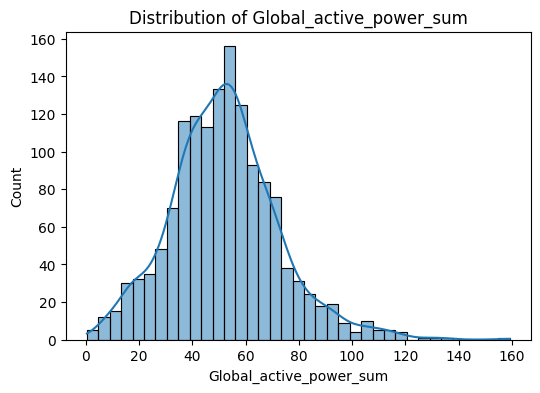

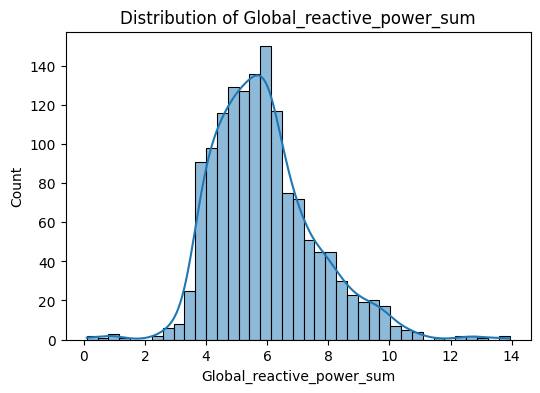

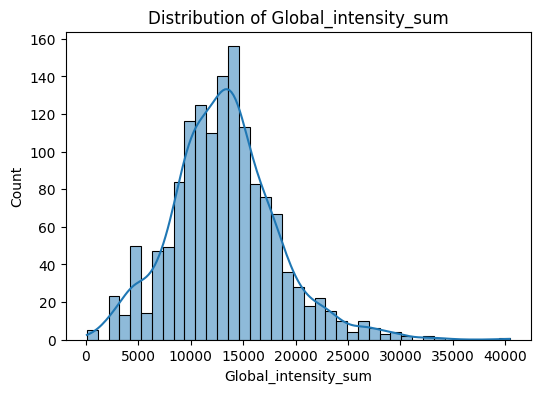

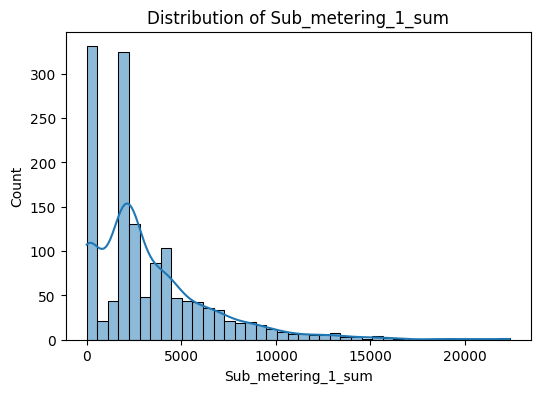

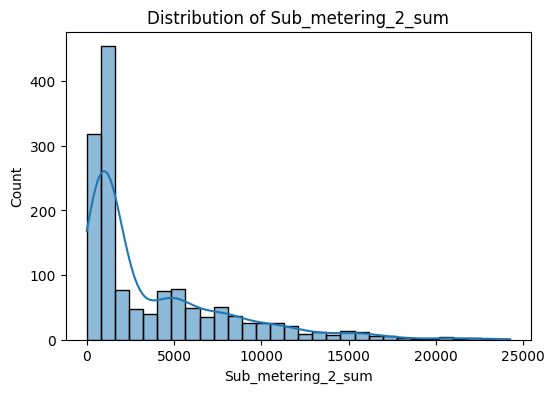

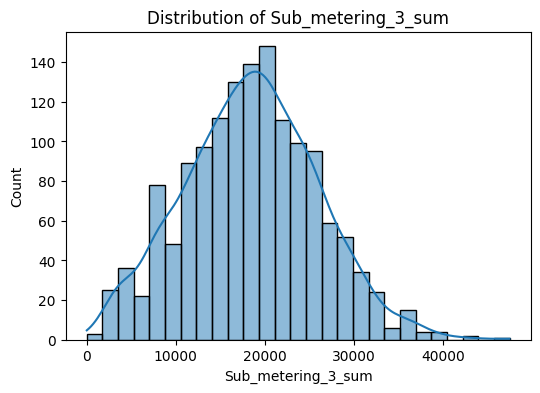

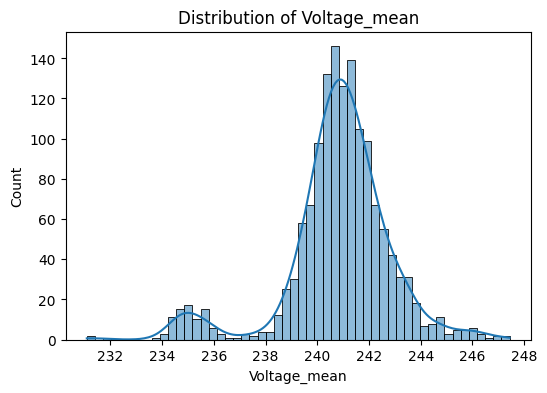

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


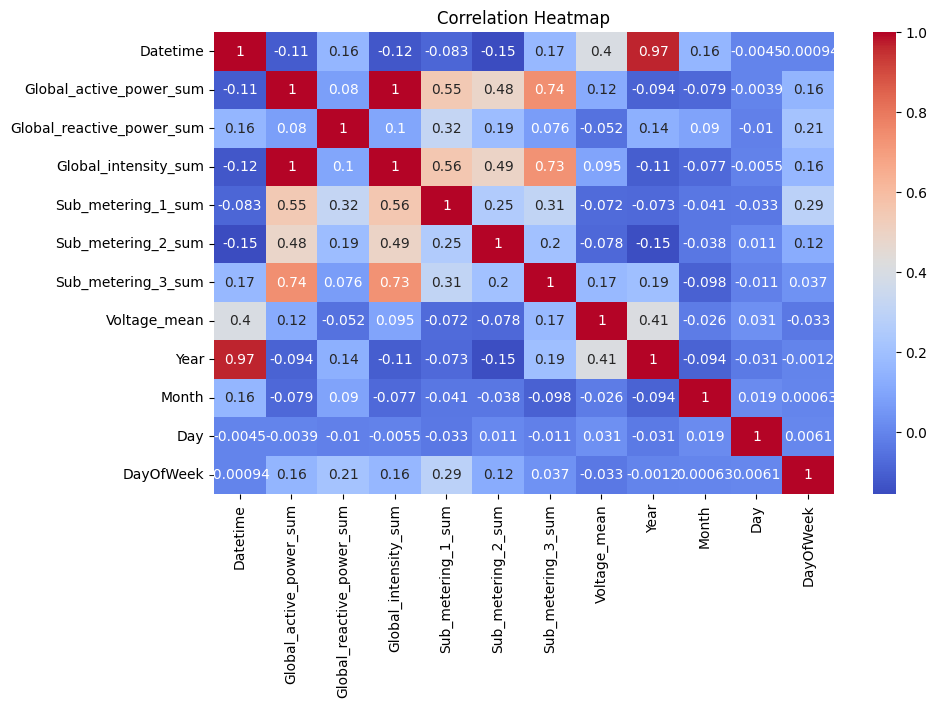

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


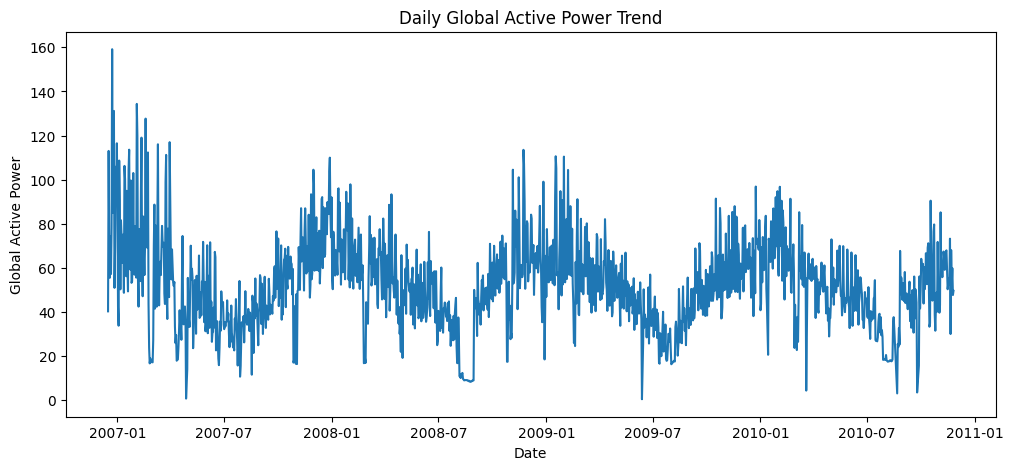

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Datetime'], df['Global_active_power_sum'])
plt.title("Daily Global Active Power Trend")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.show()


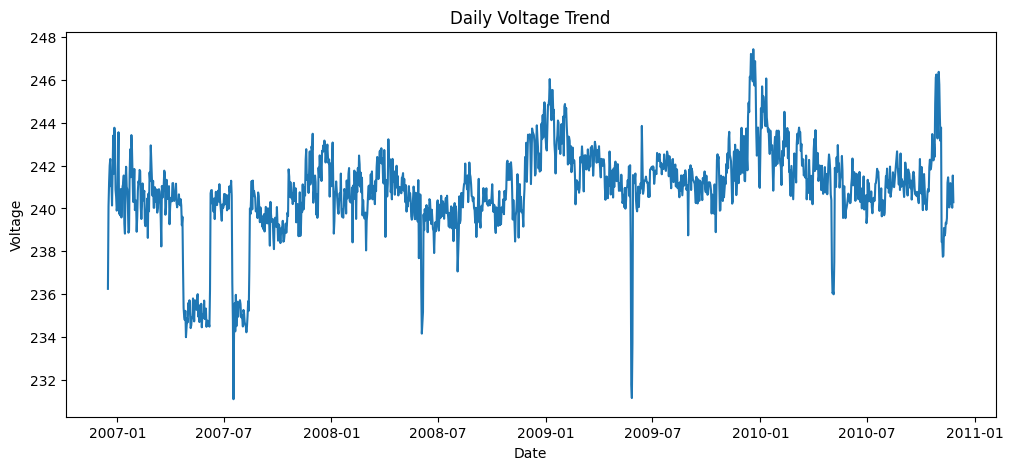

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Datetime'], df['Voltage_mean'])
plt.title("Daily Voltage Trend")
plt.xlabel("Date")
plt.ylabel("Voltage")
plt.show()


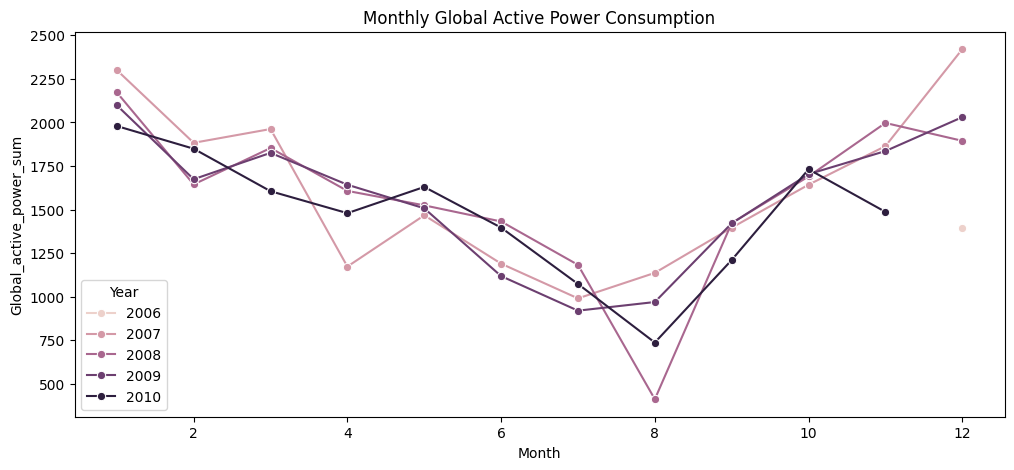

In [ ]:
monthly_df = df.groupby(['Year','Month'])['Global_active_power_sum'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_df, x='Month', y='Global_active_power_sum', hue='Year', marker='o')
plt.title("Monthly Global Active Power Consumption")
plt.show()


<Figure size 1000x500 with 0 Axes>

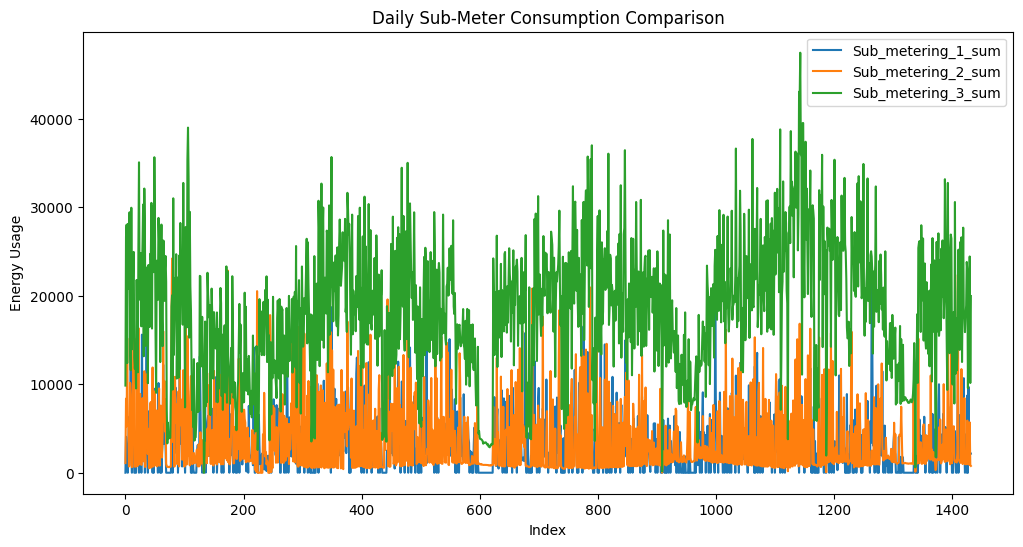

In [ ]:
plt.figure(figsize=(10,5))
df[['Sub_metering_1_sum','Sub_metering_2_sum','Sub_metering_3_sum']].plot(figsize=(12,6))
plt.title("Daily Sub-Meter Consumption Comparison")
plt.xlabel("Index")
plt.ylabel("Energy Usage")
plt.show()


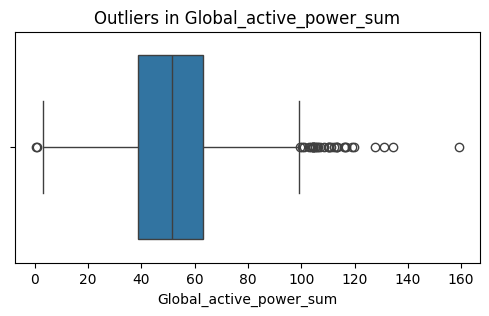

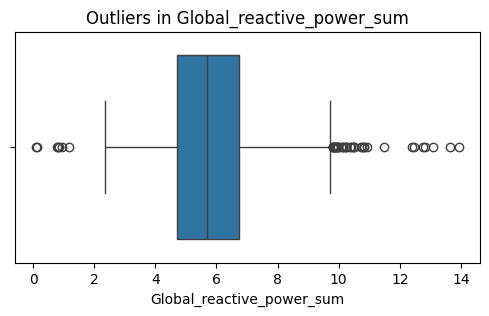

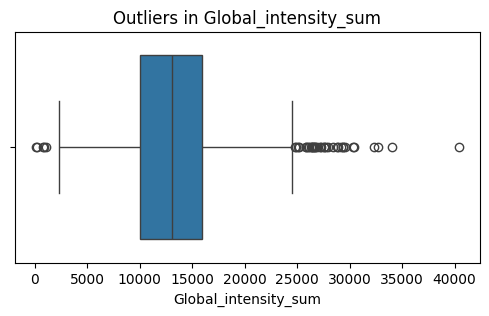

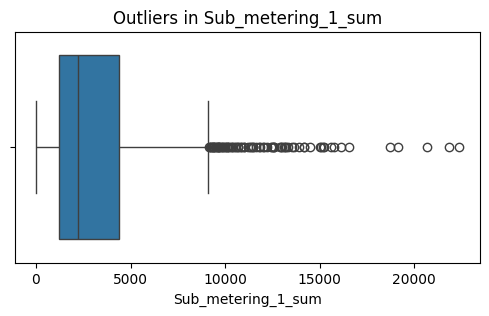

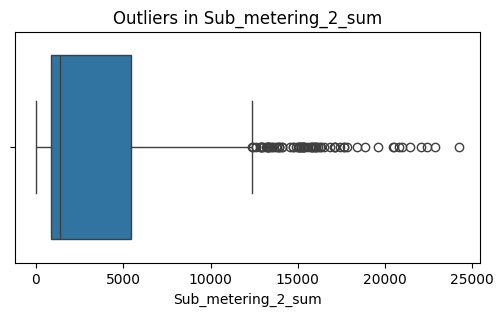

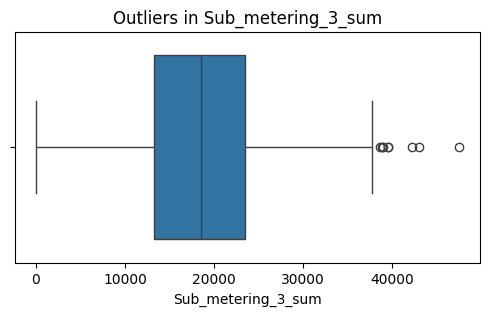

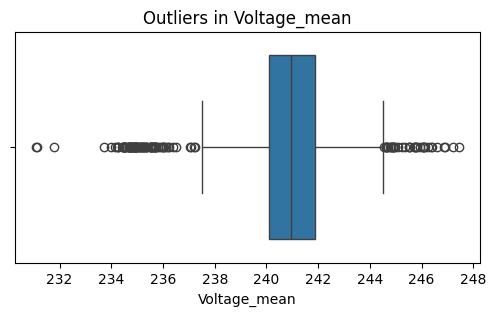

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [ ]:
import numpy as np

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = series[(series < lower) | (series > upper)]
    return len(outliers)

outlier_counts = {}

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    outlier_counts[col] = count_outliers(df[col])

outlier_counts


{'Global_active_power_sum': 34,
 'Global_reactive_power_sum': 43,
 'Global_intensity_sum': 40,
 'Sub_metering_1_sum': 78,
 'Sub_metering_2_sum': 73,
 'Sub_metering_3_sum': 8,
 'Voltage_mean': 128}